**Objetivo**

Esta modelagem tem como objetivo criar um padrão de duração de produção levando em consideração a bitola, quantidade, peso, comprimento e o formato da etiqueta processada. Com esses modelos, poderá ser avaliado a performance do operador em CADA etiqueta isolada das suas paradas operacionais. Isso possibilitará incluir essa análise de desempenho por etiqueta no Painel de Produção.

**Adicionando as bibliotecas**

Aqui foram importadas algumas libraries que ajudarão no carregamento, processamento, modelagem e exibição dos dados e resultados.


In [ ]:
!pip install regressors

In [ ]:
import pandas as pd                                                                                     # Para lidar com os dados em csv
import seaborn as sns                                                                                   # PARA LIDAR COM O PLOT DOS GRÁFICOS
import numpy as np
import matplotlib.pyplot as plt                                                                         # PARA LIDAR COM O PLOT DOS GRÁFICOS
from regressors import stats                                                                            # Para imprimir o sumário de indicadores da regressão
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import r2_score                                                                    # Para validar o modelo manualmente
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, OneHotEncoder, QuantileTransformer, FunctionTransformer # Para lidar com o preprocessamento dos dados
from sklearn.pipeline import make_pipeline                                                              # Para utilizar pipelines
from sklearn.compose import make_column_transformer, TransformedTargetRegressor                         # Para lidar com preprocessamento de multiplas colunas
from sklearn.model_selection import cross_val_score, train_test_split                                   # Para validar o modelo
from yellowbrick.regressor import residuals_plot
%matplotlib inline

**Armazenando os links dos dados de Maquina em variáveis**

Aqui, os links para os dados foram caregaods para o código. Isso permitirá alternar a máquina avaliada de forma fácil e rápida.

Os dados podem ser baixados através de um repositório do meu [Google Drive](https://drive.google.com/drive/folders/1G6VSFY53zmmywiT_pnW5Bi21bNF4nZ1b?usp=sharing)  no formato .csv.

In [ ]:
CAL01_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/CAL-01/CAL-01_2019.csv"
CL01_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/CL-01/CL-01_2019.csv"
CS4001_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/CS40-01/CS40-01_2019.csv"
CS44001_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/CS440-01/CS440-01_2019.csv"
FC01_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/FC-01/FC-01_2019.csv"
FT01_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/FT-01/FT-01_2019.csv"
FT02_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/FT-02/FT-02_2019.csv"
FT03_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/FT-03/FT-03_2019.csv"
FT1601_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/FT16-01/FT16-01_2019_2.csv"
MT1001_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/MT10-01/MT10-01_2019.csv"
P12001_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/P120-01/P120-01_2019.csv"
PL1601_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/PL16-01/PL16-01_2019_2.csv"
PL1602_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/PL16-02/PL16-02_2019_2.csv"
PL2001_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/PL20-01/PL20-01_2019.csv"
T24501_Link = "/content/drive/My Drive/Gerdau/Duração de produção 2019/T245-01/T245-01_2019.csv"

**Carregando o dataset**

In [ ]:
#Puxa o .csv do repositório.
CAL01 = pd.read_csv(CAL01_Link, sep =';', decimal=',')
CL01 = pd.read_csv(CL01_Link, sep =';', decimal=',')
CS4001 = pd.read_csv(CS4001_Link, sep =';', decimal=',')
CS44001 = pd.read_csv(CS44001_Link, sep =';', decimal=',')
FC01 = pd.read_csv(FC01_Link, sep =';', decimal=',')
FT01 = pd.read_csv(FT01_Link, sep =';', decimal=',')
FT02 = pd.read_csv(FT02_Link, sep =';', decimal=',')
FT03 = pd.read_csv(FT03_Link, sep =';', decimal=',')
FT1601 = pd.read_csv(FT1601_Link, sep =';', decimal=',')
MT1001 = pd.read_csv(MT1001_Link, sep =';', decimal=',')
P12001 = pd.read_csv(P12001_Link, sep =';', decimal=',')
PL1601 = pd.read_csv(PL1601_Link, sep =';', decimal=',')
PL1602 = pd.read_csv(PL1602_Link, sep =';', decimal=',')
PL2001 = pd.read_csv(PL2001_Link, sep =';', decimal=',')
T24501 = pd.read_csv(T24501_Link, sep =';', decimal=',')

# Junta todas os DataFrames em um único DataFrame
Maquina_Bruto = PL2001

# Cria um dataframe utilizando somente os campos de interesse
Maquina = Maquina_Bruto.drop(['Maquina' ,'Data_ref', 'Romaneio', 'Sequencia', 'Posicao', 'Operador', 'Início', 'Término'] ,axis=1)
# Converte 'Formato' para string. Isso servirá para tratar o fomrato como uma variável categórica.
Maquina['Formato'] = Maquina_Bruto['Formato'].astype(str).str.zfill(3)

# Carrega os 5 primeiros dados
Maquina.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Bitola,Quantidade,Peso unitario,Comprimento,Formato,Duração
0,16,4,12.38730,7850,002,0.000498
1,16,4,10.77774,6830,002,0.001100
2,16,8,15.02256,9520,003,0.001146
3,16,4,12.81336,8120,003,0.000741
4,16,32,9.56268,6060,003,0.010278


In [ ]:
#Verifica o tipo de dado em cada coluna, a quantidade de linhas e a existência de dados nulos
Maquina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73750 entries, 0 to 73749
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bitola         73750 non-null  int64  
 1   Quantidade     73750 non-null  int64  
 2   Peso unitario  73750 non-null  float64
 3   Comprimento    73750 non-null  int64  
 4   Formato        73750 non-null  object 
 5   Duração        73750 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 3.4+ MB


In [ ]:
#Quantifica os dados nulos em cada coluna
Maquina.isnull().sum()

Bitola           0
Quantidade       0
Peso unitario    0
Comprimento      0
Formato          0
Duração          0
dtype: int64

 **Análise de dados**

Aqui, os dados serão analisados graficamente para identificar o seus comportamentos. Dessa forma, será necessário definir a **Duração de produção** como uma variável dependente de 3 variáveis independentes:


1.   **Bitola**
2.   **Formato**
3.   **Comprimento**
4.   **Quantidade**
4.   **Peso**



In [ ]:
# Bitola = Maquina['Bitola']
# Formato = Maquina['Formato']
# Comprimento = Maquina['Comprimento']
# Quantidade = Maquina['Quantidade']
# Peso = Maquina['Peso unitario']
# Duração = Maquina['Duração']

#sns.pairplot(Maquina_sBaixa)                 # Plot das variáveis

#Maquina_sBaixa.corr()                         # Correlação das variáveis

# **Metodologia**

A partir de agora, os dados serão trabalhados de duas formas diferentes de modo a identificar se os resultados são melhores ao preprocessá-los com RobustScalar ou não. Ao fim, será selecionado o modelo que apresentar o menor erro quadrático médio.

**Tratamento de dados**

Nesta seção, os dados foram padronizados de forma que os Outliers não prejudiquem a criação do modelo de predição. Além disso, foi aplicado o *One Hot Encoder* para tratar os dados categóricos presentes nos campos 'Máquina' e 'Formato'.

In [ ]:
# Retirando as baixas de produção. Para isso, considerei que qualquer duração abaixo de 50 segundos foi baixa.
# Dessa forma, devo retirar os dados em que [Duração] * (24 * 3600) < 50 segundos
# Além disso, devo retirar os dados em que [Duração] * (24 * 60) > 50 minutos

Maquina_sBaixa = Maquina[(Maquina.Duração > ((50)/(24 * 3600))) & (Maquina.Duração < ((50)/(24 * 60))) ]
Maquina_sBaixa

,Bitola,Quantidade,Peso unitario,Comprimento,Formato,Duração
1,16,4,10.77774,6830,002,0.001100
2,16,8,15.02256,9520,003,0.001146
3,16,4,12.81336,8120,003,0.000741
4,16,32,9.56268,6060,003,0.010278
5,16,16,9.72048,6160,003,0.002662
...,...,...,...,...,...,...
73745,16,8,4.24482,2690,002,0.001412
73746,16,2,3.18756,2020,002,0.003056
73747,16,6,3.45582,2190,002,0.001007
73748,16,30,3.45582,2190,002,0.004664


**Dividindo o dataset**

Nesta seção, o *dataset* será dividido nas seções de treino e de teste. Isso é necessário para que o modelo final de fato represente uma ferramenta capaz de predizer os dados sem gerar *Overfiting*.

In [ ]:
# Dividindo as variáveis dependentes e independentes
X = Maquina_sBaixa.drop('Duração', axis=1)
y = Maquina_sBaixa['Duração'].astype(float)

X2 = Maquina.drop('Duração', axis=1)
y2 = Maquina['Duração'].astype(float)

**Pré-processamento**

Nesta seção, os dados passarão por [pré-processamento](https://scikit-learn.org/stable/modules/preprocessing.html) utilizando o [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) para tratar as variáveis categórigas e o [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) para normalizar os dados numéricos.

Será criado um modelo linear de regressão utilizando o [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), pois utiliza o método [Gradient Descent](https://pt.wikipedia.org/wiki/M%C3%A9todo_do_gradiente) para estimar iterativamente o modelo que possui o menor R².

Por fim, esses passos serão compilados utilizando o [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) para reduzir as linhas de código e falicitar a implementação para novas máquinas e remodelagem com a entrada de novos dados.

## **Criando o modelo linear**

In [ ]:
# Dividindo o dataset em treino e teste para validar manualmente
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# Instanciando o make_column_transformer para validação manual
mct_manual = make_column_transformer(
    # Utilizando o OneHotEncoder para tratar as variáveis categóricas
    (OneHotEncoder(handle_unknown='error', drop='first'), ['Formato']),

    # Utilizando o RobustScaler para Normalização dos dados numéricos
    (RobustScaler(), ['Quantidade', 'Peso unitario', 'Comprimento']),

    # Colocando a variável X na escala logarítmica
    (FunctionTransformer(np.log1p, validate=True), ['Quantidade', 'Peso unitario', 'Comprimento'])
)

# Instanciando o make_column_transformer para validação automatica
mct_automatic = make_column_transformer(
    # Utilizando o OneHotEncoder para tratar as variáveis categóricas
    (OneHotEncoder(handle_unknown='ignore'), ['Formato']),

    # Utilizando o RobustScaler para Normalização dos dados numéricos
    (RobustScaler(), ['Quantidade', 'Peso unitario', 'Comprimento']),

    # Colocando a variável X na escala logarítmica
    (FunctionTransformer(np.log1p, validate=True), ['Quantidade', 'Peso unitario', 'Comprimento'])
)

# Aplicando transformaçoes no set geral para validar automaticamente
mct_automatic.fit_transform(X)

# Aplicando transformações no set de teste para validar manualmente
mct_manual.fit(X)
X_train = mct_manual.transform(X_train)

# Instanciando o modelo de regressão linear
Modelo_linear = LinearRegression()

In [ ]:
# Validando o modelo manualmente

# Treinando o modelo linear com os dados de treino
Modelo_linear.fit(X_train, Y_train)

# Aplicando transformações nos dados de teste
X_test = mct_manual.transform(X_test)

# Predizendo os valores X de teste e comparando com os valores Y de teste
Y_Pred = Modelo_linear.predict(X_test)

# Avaliando o modelo manual
print(r2_score(Y_test, Y_Pred))



0.43362209403262086


In [ ]:
# Validando o modelo automaticamente


# Criando a pipeline para validar automaticamente
pipe = make_pipeline(mct_automatic, Modelo_linear)

# Validação cruzada com 5 folds
cross_val_score(pipe, X, y, cv=5, scoring='r2', n_jobs=-1).mean()

0.4182946932209951

**Análise residual**

No intúito de verificar a qualidade do modelo gerado, foi plotado um gráfico de [análise residual](https://www.scikit-yb.org/en/latest/api/regressor/residuals.html). Essa análise busca verificar se um modelo é ou não apropriado para o dataset ao avaliar a distribuição dos resíduos. Essa diferença entre observado e predito deve ser distribuido normalmente ao longo dos valores preditos, indicando que o grau polinomial aplicado ao modelo é apropriado.

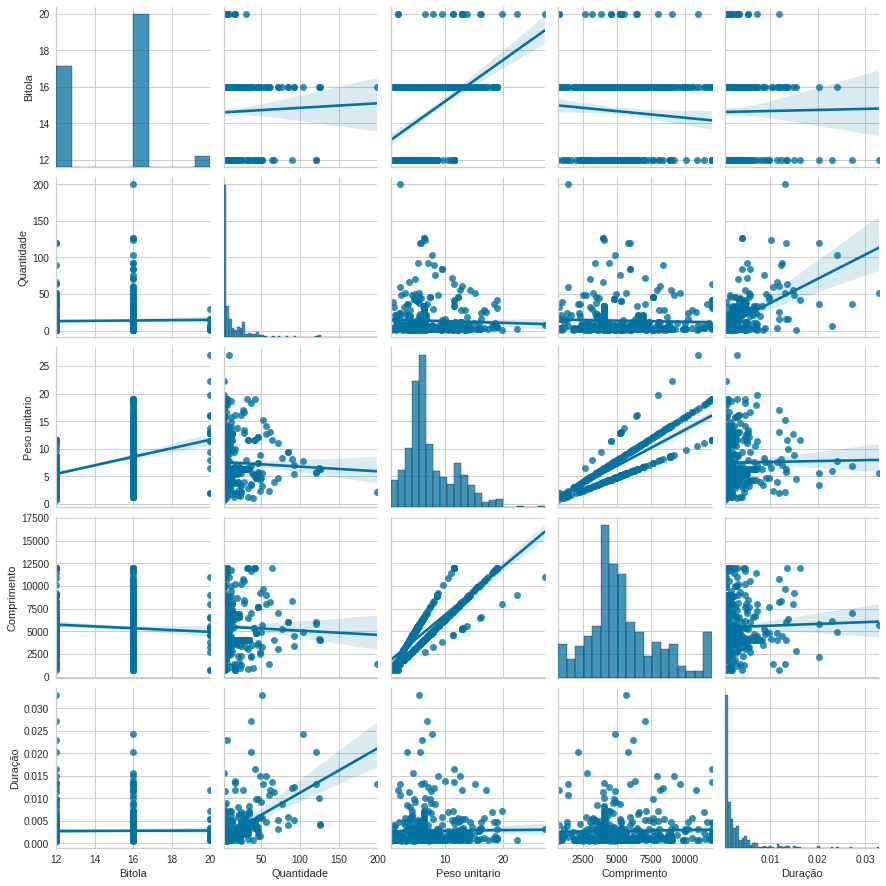

In [ ]:
# Imprimindo a tabela de sumário

# print("\n=========== SUMÁRIO ===========")
# xlabels = list(Maquina_sBaixa.columns.values)
# stats.summary(Modelo_linear, X, y, xlabels)
import seaborn as sns
sns.pairplot(Maquina_sBaixa.sample(500), kind="reg")

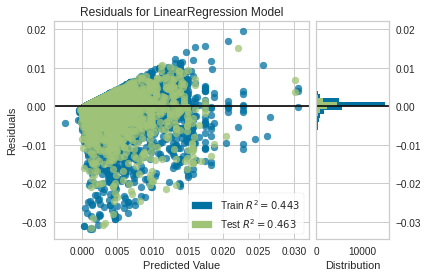

In [ ]:
#Instanciando o residuals_plot do yellowbrick
Resid = residuals_plot(pipe, X, y)